# Problem Statement

 A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

#### * Which variables are significant in predicting the demand for shared bikes.
#### * How well those variables describe the bike demands
 Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 
 
 
# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### ----------------------------------------------------------------------------------------------------------------------------------------------------

# A) Lets import necessary libraries

In [1]:
#Lets import necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# B) Reading the data from csv file

In [2]:
#Reading the data from csv file and print  first 5 values
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking shape & describing
print('Shappe = ', bike_df.shape, '\n ')
bike_df.describe()

Shappe =  (730, 16) 
 


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
# checkin the Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# C) Lets Clean the Dataframe

#### 1) Lets check the null values

In [5]:
#Checking the null Values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* there are no null Values

#### 2) Removing the Duplicate Values

In [6]:
# remove the duplicates
bike_df.drop_duplicates(inplace=True)
bike_df.shape

(730, 16)

* even after dropping the duplicates the shape is same hence there are no duplicate values

In [7]:
#dataframe preview
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Lets drop the columns that dont contribute in the analysis
* instant  column has Serial Number of the rows
* dteday has same data which we can obtain from the other columns "yr& month"
* As we are using the value of cnt we dont need casual and register as Cnt = casual + registered

In [8]:
#Dropping the columns
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [9]:
# lets check the Data
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Creating the dummy variables
* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* mnth : month ( 1 to 12)
* weekday : day of the week (1 to 7)
* weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [10]:
# mapping for Season
bike_df['season'] = bike_df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# mapping  for month
bike_df['mnth'] = bike_df['mnth'].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "June", 7: "July", 8: "Aug", 9: "Sept", 10 : "Oct", 11: "Nov", 12 : "Dec"})

# mapping for Week Days
bike_df['weekday'] = bike_df['weekday'].map({0: "Sun", 1: "Mon", 2: "Tues", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})

# mapping  for Weathersit
bike_df['weathersit'] = bike_df['weathersit'].map({1: "Clear", 2: "Misty", 3: "LightSnow or Rain", 4: "HeavySnow or Rain"})



In [11]:
# Checking the DataFrame
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Identify Outliers

In [12]:
# Checking unique Values
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### Values in the column 'temp', 'atemp', 'hum', 'windspeed'  contribute the readings which are continous  

----------TEMP----------


count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


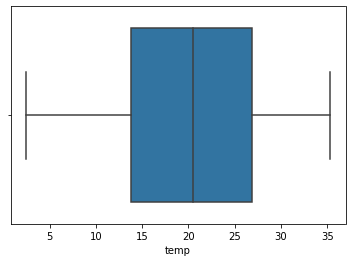

----------ATEMP----------


count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64


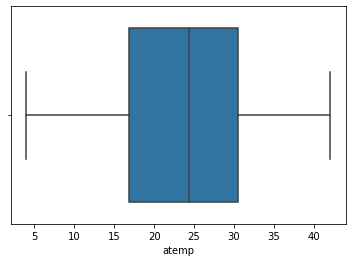

----------HUM----------


count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64


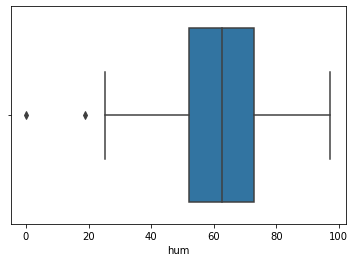

----------WINDSPEED----------


count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


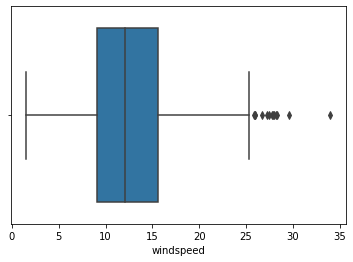

In [13]:
# Checking for the Outliers and Also Describe 

cont = ['temp', 'atemp', 'hum', 'windspeed' ]



for i in cont:
    print('----------'+i.upper()+'----------')
    sns.boxplot(bike_df[i])
    print('\n')
    print(bike_df[i].describe())
    plt.show()


* There Are no outliers with Huge Difference hence there is no need to remove the outliers

### Checking the Linear Relationship with Different methodes

#### Relationship with Pair Plots

<Figure size 1080x2160 with 0 Axes>

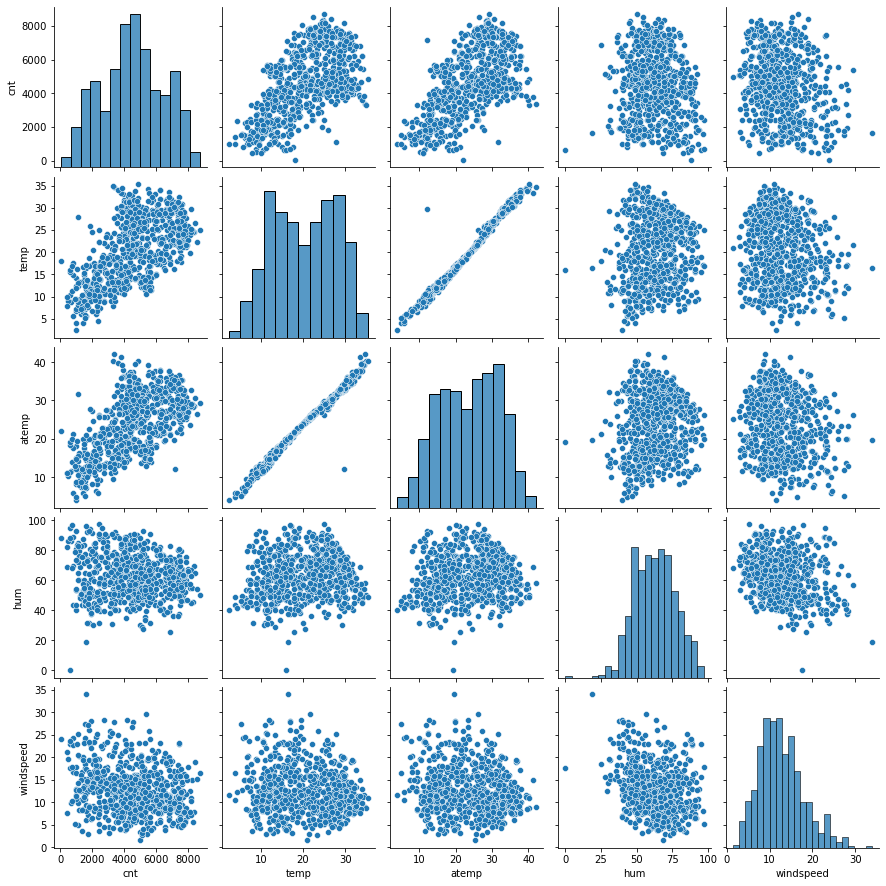

In [14]:
#Plotting pair plots
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Relationship with Box plots

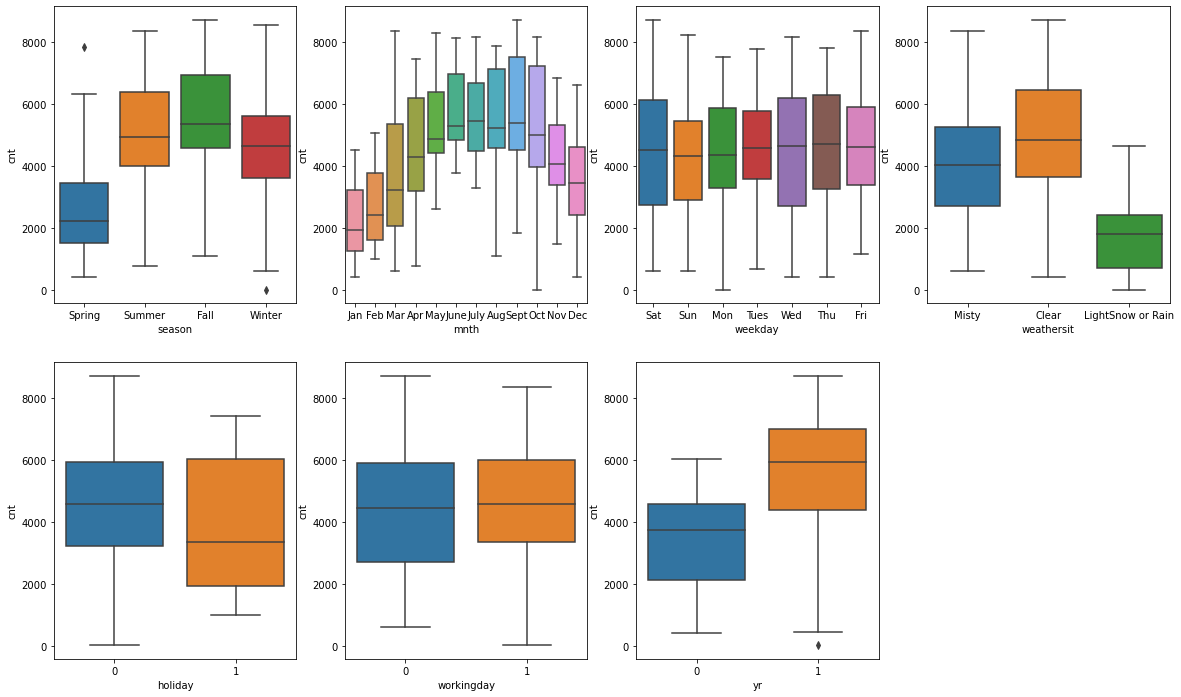

In [15]:
# Presenting the categorical columns with Box Plots

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)

plt.show()

#### Relationship With Bar Plots

Relationship between season and count 

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64


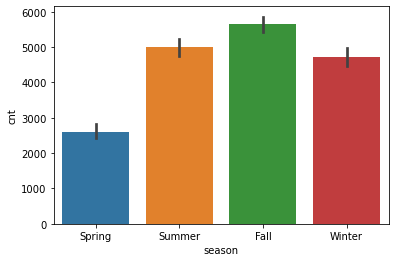

In [16]:
# create barplot of categorical columns
print(bike_df["season"].value_counts())
sns.barplot(bike_df["season"],bike_df["cnt"])
plt.show()



Relationship between Month  and count

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sept    60
Nov     60
Feb     56
Name: mnth, dtype: int64


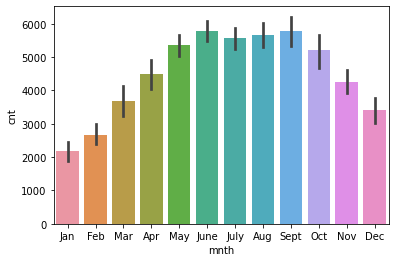

In [17]:
# create barplot of categorical columns
print(bike_df["mnth"].value_counts())
sns.barplot(bike_df["mnth"],bike_df["cnt"])
plt.show()

Relationship between year and count

0    365
1    365
Name: yr, dtype: int64


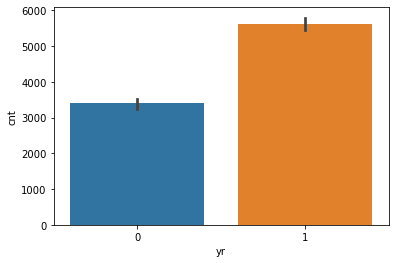

In [18]:
# create barplot of categorical columns
print(bike_df["yr"].value_counts())
sns.barplot(bike_df["yr"],bike_df["cnt"])
plt.show()

Relationship between weekday and Count


Sat     105
Sun     105
Mon     105
Tues    104
Thu     104
Fri     104
Wed     103
Name: weekday, dtype: int64


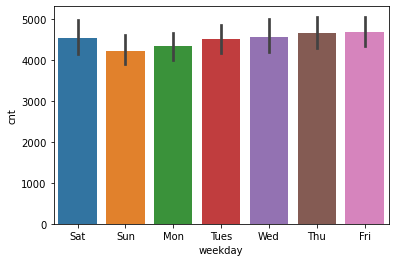

In [19]:
# create barplot of categorical columns
print(bike_df["weekday"].value_counts())
sns.barplot(bike_df["weekday"],bike_df["cnt"])
plt.show()

Relationship between weathersit and count

Clear                463
Misty                246
LightSnow or Rain     21
Name: weathersit, dtype: int64


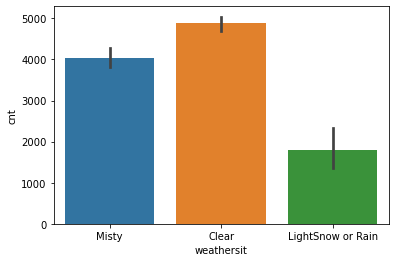

In [20]:
# create barplot of categorical columns
print(bike_df["weathersit"].value_counts())
sns.barplot(bike_df["weathersit"],bike_df["cnt"])
plt.show()

Relationship between holiday and count

0    709
1     21
Name: holiday, dtype: int64


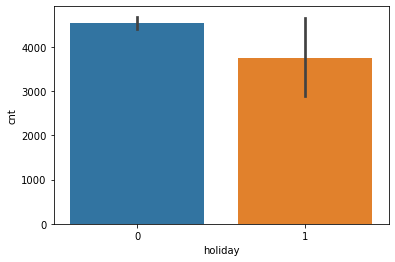

In [21]:
# create barplot of categorical columns
print(bike_df["holiday"].value_counts())
sns.barplot(bike_df["holiday"],bike_df["cnt"])
plt.show()

Relationship between working day and count

1    499
0    231
Name: workingday, dtype: int64


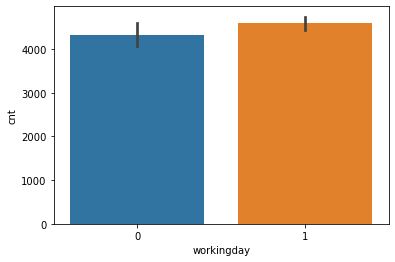

In [22]:
# create barplot of categorical columns
print(bike_df["workingday"].value_counts())
sns.barplot(bike_df["workingday"],bike_df["cnt"])
plt.show()

### Checking the Relationship between columns with Heat map

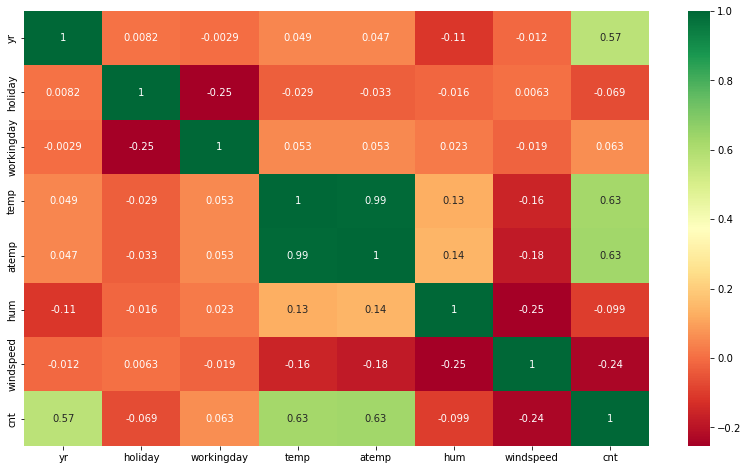

In [23]:
#Plotting the heatmap
plt.figure(figsize = (14,8))
sns.heatmap(bike_df.corr(), annot = True, cmap="RdYlGn")
plt.show()

# Conclusions

#### Following are the conclusions made on the basis of the EDA done above

* Fall season seems to have more bookings and Spring season has lowest number of Bookings. 
* Number of bookings are highest in the month of September and lowest in the month of january.
* bike demand is lowest on the Sunday as compared to other week days.
* Demand decreases on holidays.
* There is high demand on the clear weather days and less demand on Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds days
* Also the demand aslo increased across the year as compared from 2018 to 2019 year.

* From the Heat map, temp & atemp seems to be highly correlated that is 0.99 . but they cant be used due to multicolinerity. Hence We will drop it.

In [24]:
#Dropping the atemp column
bike_df = bike_df.drop("atemp", axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tues,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


# Lets Build a Model

Createing Dummy Variables

In [25]:
# Createing Dummy Variable
bike_df = pd.get_dummies(data=bike_df,columns=['season','mnth','weekday', 'weathersit'],drop_first=True)
# Printing the columns
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tues', 'weekday_Wed', 'weathersit_LightSnow or Rain',
       'weathersit_Misty'],
      dtype='object')

In [26]:
# printingthe first 5 lines of the dataframe 
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_LightSnow or Rain,weathersit_Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Spliting the Data into training and test

In [27]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.70, test_size = 0.30, random_state = 100)
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_LightSnow or Rain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Lets Check the shape and size for train and test


In [28]:
# Checking shape and size for train and test
print(df_train.shape)
print(df_test.shape)


(510, 29)
(219, 29)


## Scaling of continuous variables

Making Sure that all features are in same scale to interpret easily


In [29]:
num_vars = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_LightSnow or Rain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building a Model using RFE 

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train
# Lienar Regression model for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [31]:
# RFE with features to select as 15 
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

Columns selected in RFE and its rankings

In [32]:
#Columns selected in RFE and its rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 11),
 ('weekday_Tues', False, 9),
 ('weekday_Wed', False, 12),
 ('weathersit_LightSnow or Rain', True, 1),
 ('weathersit_Misty', True, 1)]

Printing the Selected columns and dropped columns

In [33]:
#Printing the Selected columns and dropped columns
cols_selected = X_train.columns[rfe.support_]
print(cols_selected)

cols_dropped = X_train.columns[~rfe.support_]
print(cols_dropped)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_July', 'mnth_Sept', 'weekday_Sat', 'weathersit_LightSnow or Rain',
       'weathersit_Misty'],
      dtype='object')
Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tues', 'weekday_Wed'],
      dtype='object')


Function to create linear model using Stats models

In [34]:
# Building a model with statsmodel this will selectthe columns for model as a parameter.
def create_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

Function to calculate VIF and print values

In [35]:
# Function to calculate VIFs and print them -selects the columns for which calculation of the VIF to be done. 
def calculate_VIF(X_train_sm):
    vif = pd.DataFrame()
    vif['Features'] = X_train_sm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

Building model using statsmodel
### Model With the columns selected by the RFE

In [36]:
lm_1 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.31e-191
Time:                        14:54:08   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_Spring,4.53
8,season_Winter,3.48
7,season_Summer,2.84
14,weathersit_Misty,2.29
0,yr,2.09
12,weekday_Sat,1.98


the VIF value of hum is greater than 5.



Drop hum column and re-evaluate

In [37]:
#Re-evaluating the model
cols_selected = ['yr', 'workingday', 'temp', 'holiday', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
       'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_2 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'workingday', 'temp', 'holiday', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          6.05e-186
Time:                        14:54:08   Log-Likelihood:                 514.97
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     491   BIC:                            -911.5
Df Model:                          18                                         
Covariance Type:     

,Features,VIF
1,workingday,29.45
15,weekday_Sat,7.49
16,weekday_Sun,6.88
2,temp,4.91
5,season_Spring,2.91
6,season_Winter,2.44
3,holiday,2.17
10,mnth_July,1.96
9,mnth_Jan,1.95
7,mnth_Aug,1.90


p-value for the feature holiday = 0.505 which is greater than the significance level of alpha = 0.05



Drop holiday column and re-evaluate

In [38]:
#Re-evaluating the model
cols_selected = ['yr', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
       'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_3 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'workingday', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          6.05e-186
Time:                        14:54:09   Log-Likelihood:                 514.97
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     491   BIC:                            -911.5
Df Model:                          18                                         
Covariance Type:            nonr

,Features,VIF
2,temp,19.90
1,workingday,14.65
3,windspeed,4.69
14,weekday_Sat,4.12
15,weekday_Sun,3.81
4,season_Spring,3.22
5,season_Winter,3.07
0,yr,2.08
6,mnth_Aug,2.03
9,mnth_July,2.01


p-value for the feature mnth_Aug = 0.132 which is greater than the significance level of alpha = 0.05



Drop mnth_Aug column and re-evaluate

In [39]:
#Re-evaluating the model
cols_selected = ['yr', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan',
       'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_4 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'workingday', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     157.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.46e-186
Time:                        14:54:09   Log-Likelihood:                 513.79
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     492   BIC:                            -915.4
Df Model:                          17                                         
Covariance Type:            nonrobust       

,Features,VIF
2,temp,14.61
1,workingday,14.43
3,windspeed,4.58
13,weekday_Sat,4.10
14,weekday_Sun,3.75
4,season_Spring,3.21
5,season_Winter,2.87
0,yr,2.08
7,mnth_Jan,2.01
11,mnth_Nov,1.79


p-value for the feature mnth_June  is greater than the significance level of alpha = 0.05



Drop mnth_June column and re-evaluate

In [40]:
#Re-evaluating the model
cols_selected = ['yr', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan',
       'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_5 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'workingday', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.12e-187
Time:                        14:54:09   Log-Likelihood:                 513.79
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     493   BIC:                            -921.6
Df Model:                          16                                         
Covariance Type:            nonrobust                    

,Features,VIF
1,workingday,14.41
2,temp,13.46
3,windspeed,4.57
12,weekday_Sat,4.09
13,weekday_Sun,3.75
4,season_Spring,3.19
5,season_Winter,2.81
0,yr,2.07
7,mnth_Jan,2.00
10,mnth_Nov,1.79


p-value for the feature mnth_Mar and weekday_Sun  is greater than the significance level of alpha = 0.05



Drop mnth_Mar and weekday_Sun column and re-evaluate

In [41]:
#Re-evaluating the model
cols_selected = ['yr', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan',
       'mnth_July', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_6 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'workingday', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.64e-189
Time:                        14:54:09   Log-Likelihood:                 511.64
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     495   BIC:                            -929.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
     

,Features,VIF
2,temp,6.72
1,workingday,4.56
3,windspeed,4.17
5,season_Winter,2.56
4,season_Spring,2.45
0,yr,2.07
11,weekday_Sat,1.82
9,mnth_Nov,1.77
7,mnth_Jan,1.67
13,weathersit_Misty,1.55


the VIF value of temp is greater than 5 hence Lets Drop the temp column

In [42]:
#Re-evaluating the model
cols_selected = ['yr', 'workingday', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan',
       'mnth_July', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_7 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'workingday', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          6.61e-161
Time:                        14:54:09   Log-Likelihood:                 441.88
No. Observations:                 510   AIC:                            -855.8
Df Residuals:                     496   BIC:                            -796.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
             

,Features,VIF
2,windspeed,3.51
1,workingday,3.19
4,season_Winter,2.56
3,season_Spring,2.31
0,yr,1.88
8,mnth_Nov,1.76
6,mnth_Jan,1.64
10,weekday_Sat,1.55
12,weathersit_Misty,1.54
5,mnth_Dec,1.46


R-Squared and Adjusted R-Squared values decreased after removing the feature 'temp' 
So, instead of dropping 'temp', dropping the feature 'workingday' which has the highest VIF value after temp

Add temp, remove workingday and re-evaluate

In [43]:
#Re-evaluating the model
cols_selected = ['yr', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan',
       'mnth_July', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_8 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          5.60e-185
Time:                        14:54:09   Log-Likelihood:                 499.16
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     496   BIC:                            -911.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   

,Features,VIF
1,temp,4.70
2,windspeed,4.08
4,season_Winter,2.54
3,season_Spring,2.36
0,yr,2.07
8,mnth_Nov,1.77
6,mnth_Jan,1.65
12,weathersit_Misty,1.53
5,mnth_Dec,1.46
7,mnth_July,1.36


No p-values are greater than the significance level of 0.05,

* No p - values of the features are greater than the significance level of alpha = 0.05
* The VIF values of all the predictors are also less than 5
* R - Squared (0.836) and Adjusted R - Squared (0.831) values are also above 80%, which is a good score for a linear regression model
* Prob (F-statistic): 5.60e-185 is very low, which implies that the overall significance is good
*  We dont have any insignificant variables and also there is not any multi coliinear (high VIF) variable. 
* Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

Build the final linear regression model

In [44]:
X_train_final = X_train[cols_selected]

lr = LinearRegression()
lr.fit(X_train_final, y_train)
print("Intercept value : ",lr.intercept_,"\n")
j=0
columns = X_train_final.columns
for i in columns:
    print("Coefficient of ",i," : ",lr.coef_[j])
    j+=1

Intercept value :  0.28636238207657594 

Coefficient of  yr  :  0.2356686101973274
Coefficient of  temp  :  0.401599987069429
Coefficient of  windspeed  :  -0.15791024835257292
Coefficient of  season_Spring  :  -0.10625792301183687
Coefficient of  season_Winter  :  0.06435151027752327
Coefficient of  mnth_Dec  :  -0.05312350303184046
Coefficient of  mnth_Jan  :  -0.05744084532749715
Coefficient of  mnth_July  :  -0.06375232088693827
Coefficient of  mnth_Nov  :  -0.05594604099243727
Coefficient of  mnth_Sept  :  0.04952207092042337
Coefficient of  weekday_Sat  :  0.023086406682981304
Coefficient of  weathersit_LightSnow or Rain  :  -0.29244177887961537
Coefficient of  weathersit_Misty  :  -0.07994987638750449


# Residual Analysis

In [45]:
y_train_pred = lr.predict(X_train_final)

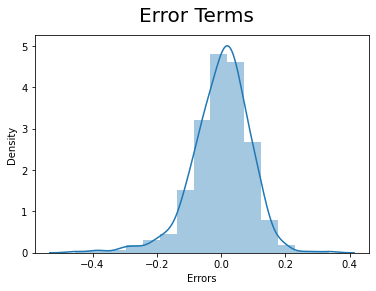

In [46]:
#Plot a histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 10)                         
plt.show()

* Error terms are normally distributed with mean 0.0

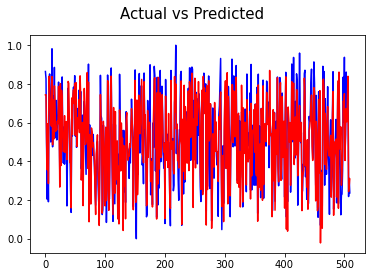

In [47]:
# Actual vs Predicted
c = [i for i in range(0, len(X_train_final), 1)]
plt.plot(c, y_train, color="blue")
plt.plot(c, y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.show()

* Actual values and Predicted values are following almost similar pattern

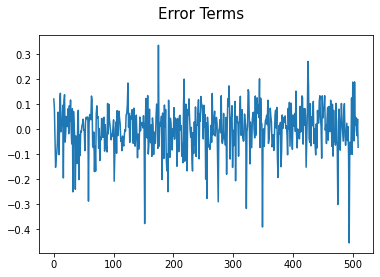

In [48]:
c = [i for i in range(0, len(X_train_final), 1)]
plt.plot(c, y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.show()

* The Error terms are independent

In [49]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8357678904978962

R2 is same as compared to the value obtained from the Final Model

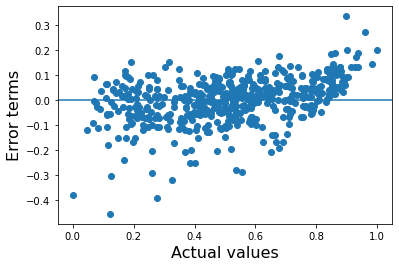

In [50]:
# # scatter plot for checking linearity
plt.scatter(y_train, y_train-y_train_pred)
plt.axhline(0)
fig.suptitle('Actual values vs Residuals', fontsize = 18)             
plt.xlabel('Actual values', fontsize = 16)                          
plt.ylabel('Error terms', fontsize = 16)   
plt.show()

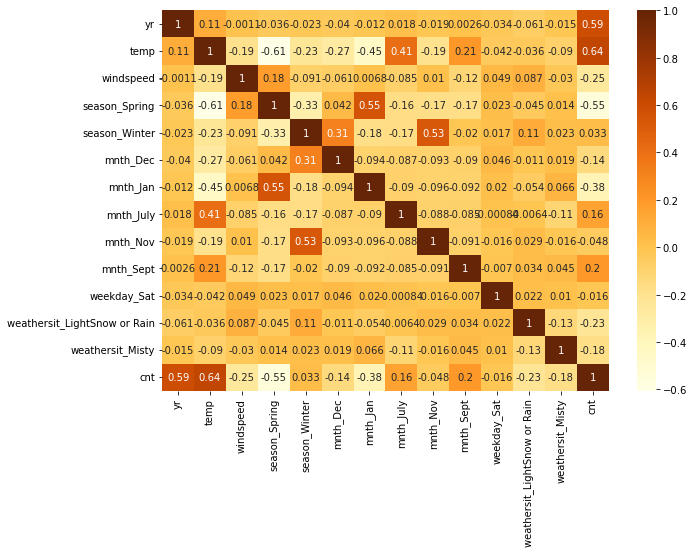

In [51]:
df = pd.concat([X_train_final, bike_df['cnt']], axis = 1)
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, cmap = "YlOrBr")
plt.show()

# Predictions using final model

In [52]:
scale_vars = ['temp','hum','windspeed','cnt']
df_test[scale_vars] = scaler.transform(df_test[scale_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_LightSnow or Rain,weathersit_Misty
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test_new = X_test[X_train_final.columns]
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lm_8.predict(X_test_new)

Plotting y_test and y_test_pred

Text(0, 0.5, 'y_test_pred')

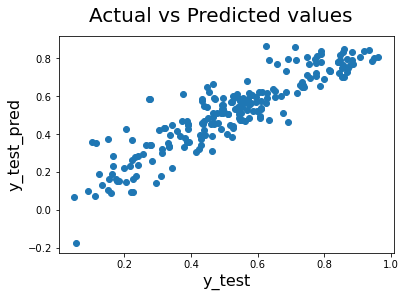

In [54]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual vs Predicted values', fontsize = 20)              
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_test_pred', fontsize = 16)  

Check R squared values of actual predicted values of train set and test set

In [55]:
print("R - squared value for train set : ",r2_score(y_train,y_train_pred))
print("R - squared value for test set : ",r2_score(y_test,y_test_pred))

R - squared value for train set :  0.8357678904978962
R - squared value for test set :  0.8164020710826941


R - squared values of the test set (83.56%) and train set (81.64%) are significantly good

Check RMSE value

In [56]:
print("Root Mean Squared Error of the model is given by : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error of the model is given by :  0.09338164706539354


RMSE of our model is very flow, model fit is good

# Conclusion

### Significant Variables coefficients

* Intercept value :  0.28636238207657594 

* Coefficient of  yr  :  0.2356686101973274
* Coefficient of  temp  :  0.401599987069429
* Coefficient of  windspeed  :  -0.15791024835257292
* Coefficient of  season_Spring  :  -0.10625792301183687
* Coefficient of  season_Winter  :  0.06435151027752327
* Coefficient of  mnth_Dec  :  -0.05312350303184046
* Coefficient of  mnth_Jan  :  -0.05744084532749715
* Coefficient of  mnth_July  :  -0.06375232088693827
* Coefficient of  mnth_Nov  :  -0.05594604099243727
* Coefficient of  mnth_Sept  :  0.04952207092042337
* Coefficient of  weekday_Sat  :  0.023086406682981304
* Coefficient of  weathersit_LightSnow or Rain  :  -0.29244177887961537
* Coefficient of  weathersit_Misty  :  -0.07994987638750449

# Analysis

### The company should take these factors into consideration.

* The company should focus on how they can increasing the demand of bikes in the spring season as it has low demand.
* The company should also focus on how they can increasing the demand of bikes in the January, February,march and December months.
* There is less bookings demand during Light Snow or Rain.


Significant features to predict the DEMAND for shared bikes are :

* 1) Season 
* 2) Weather (Light Snow or Rain, Misty)
* 3) Month (March, September, November, December)
* 4) Temperature
* 5) Year
* 6) Windspeed
* 7) Weekday (Sunday)
* 8) Holiday
* 9) weathersit( Light Snow, Mist + Cloudy)